### _In this notebook, we will be examining the nation-wide results of the 2017 SAT and ACT._

[ACT info](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

[SAT info](https://blog.prepscholar.com/average-sat-scores-by-state-most-recent)

In [1]:
import pandas as pd;
import pprint as pp;
import numpy as np;

In [2]:
# grab both from the .csv files in ../data
act_data= pd.read_csv("../data/act.csv");
sat_data= pd.read_csv("../data/sat.csv");

*Now let's get a general idea of what the DataFrames look like*

In [3]:
act_data.head(10)

,Unnamed: 0,State,Participation,English,Math,Reading,Science,Composite
0,0,National,60%,20.3,20.7,21.4,21.0,21.0
1,1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,5,California,31%,22.5,22.7,23.1,22.2,22.8
6,6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


In [4]:
sat_data.head(10)

,Unnamed: 0,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,0,Alabama,5%,593,572,1165
1,1,Alaska,38%,547,533,1080
2,2,Arizona,30%,563,553,1116
3,3,Arkansas,3%,614,594,1208
4,4,California,53%,531,524,1055
5,5,Colorado,11%,606,595,1201
6,6,Connecticut,100%,530,512,1041
7,7,Delaware,100%,503,492,996
8,8,District of Columbia,100%,482,468,950
9,9,Florida,83%,520,497,1017


It looks pretty clean so far, but that Unnamed: 0 column is an extraneous index column. I'll drop it. Another option is to pass `index_col='Unnamed: 0'` in the `.read_csv()`

In [5]:
sat_data.drop('Unnamed: 0', axis=1, inplace=True)
act_data.drop('Unnamed: 0', axis=1, inplace=True)

**This data set appears to be simple enough:**
  * State
  * % of students who participated
  * Various test scores and associated Total/Composite
  
 **A quick look at `.info()` will show that the Participation columns need to be re-cast as numerics**

In [6]:
sat_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null object
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: int64(3), object(2)
memory usage: 1.6+ KB


In [7]:
act_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
State            52 non-null object
Participation    52 non-null object
English          52 non-null float64
Math             52 non-null float64
Reading          52 non-null float64
Science          52 non-null float64
Composite        52 non-null float64
dtypes: float64(5), object(2)
memory usage: 2.5+ KB


In [8]:
# Cast the Participation strings to floats
act_data.Participation= act_data.Participation.str.rstrip('%').astype('float')/ 100.0;
sat_data.Participation= sat_data.Participation.str.rstrip('%').astype('float')/ 100.0;

**At this point we can merge the two datasets based on State**

In [9]:
combined_data=sat_data.merge(act_data, on='State', suffixes=('_SAT', '_ACT'))
combined_data.head(10)

,State,Participation_SAT,Evidence-Based Reading and Writing,Math_SAT,Total,Participation_ACT,English,Math_ACT,Reading,Science,Composite
0,Alabama,0.05,593,572,1165,1.00,18.9,18.4,19.7,19.4,19.2
1,Alaska,0.38,547,533,1080,0.65,18.7,19.8,20.4,19.9,19.8
2,Arizona,0.30,563,553,1116,0.62,18.6,19.8,20.1,19.8,19.7
3,Arkansas,0.03,614,594,1208,1.00,18.9,19.0,19.7,19.5,19.4
4,California,0.53,531,524,1055,0.31,22.5,22.7,23.1,22.2,22.8
5,Colorado,0.11,606,595,1201,1.00,20.1,20.3,21.2,20.9,20.8
6,Connecticut,1.00,530,512,1041,0.31,25.5,24.6,25.6,24.6,25.2
7,Delaware,1.00,503,492,996,0.18,24.1,23.4,24.8,23.6,24.1
8,District of Columbia,1.00,482,468,950,0.32,24.4,23.5,24.9,23.5,24.2
9,Florida,0.83,520,497,1017,0.73,19.0,19.4,21.0,19.4,19.8


**Now, to get an idea of any outliers or broken values, let's plot the min and max scores for each subject**

In [10]:
from pandas.api.types import is_numeric_dtype;
for col in combined_data:
    if is_numeric_dtype(combined_data[col]):
        min_idx= combined_data[col].idxmin();
        max_idx= combined_data[col].idxmax();
        print(f"{col}: Min:({combined_data[col][min_idx]}, {combined_data['State'][min_idx]}) Max:({combined_data[col][max_idx]}, {combined_data['State'][max_idx]}) ");

Participation_SAT: Min:(0.02, Iowa) Max:(1.0, Connecticut) 
Evidence-Based Reading and Writing: Min:(482, District of Columbia) Max:(644, Minnesota) 
Math_SAT: Min:(52, Maryland) Max:(651, Minnesota) 
Total: Min:(950, District of Columbia) Max:(1295, Minnesota) 
Participation_ACT: Min:(0.08, Maine) Max:(1.0, Alabama) 
English: Min:(16.3, Nevada) Max:(25.5, Connecticut) 
Math_ACT: Min:(18.0, Nevada) Max:(25.3, Massachusetts) 
Reading: Min:(18.1, Nevada) Max:(26.0, New Hampshire) 
Science: Min:(2.3, Maryland) Max:(24.9, New Hampshire) 
Composite: Min:(17.8, Nevada) Max:(25.5, New Hampshire) 


**Ok, so Iowans are not too keen on the SAT... That's believable. But what about Maryland's scores in the SAT Math and ACT Science? Those values seem to be out of bounds. But to make sure, let's plot them:**

In [11]:
combined_data['Math_SAT'].plot()

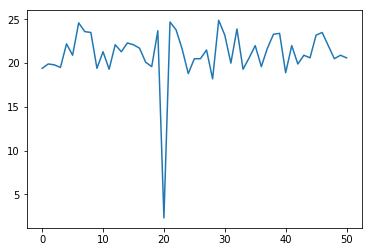

In [12]:
combined_data['Science'].plot()

**Either Maryland educators need to do some serious self-reflection, or our values were inputted wrong. Checking our source (links above), we find that in fact the scores were somehow inputted wrong into the CSV file**

In [15]:
#put in the correct values
combined_data.loc[combined_data['State']=='Maryland', 'Science']=23.2
combined_data.loc[combined_data['State']=='Maryland', 'Math_SAT']=524
combined_data.loc[combined_data['State']=="Maryland"]

,State,Participation_SAT,Evidence-Based Reading and Writing,Math_SAT,Total,Participation_ACT,English,Math_ACT,Reading,Science,Composite
20,Maryland,0.69,536,524,1060,0.28,23.3,23.1,24.2,23.2,23.6


**It would be nice to have the option of filtering and sorting our data according to a criteria**

In [16]:
def filter_scores(df, topic, threshold, sort=None):
    '''Filter based on a threshold for given participation/test score. Sort "asc" or "desc" '''
    if is_numeric_dtype(df[topic])==False:
        raise "Input a valid numeric column"
    else:
        x= df[df[topic]>=threshold];
        if sort=='asc':
            return x.sort_values(topic)
        elif sort =='desc':
            return x.sort_values(topic, ascending='False')
        return x

In [17]:
filter_scores(combined_data, 'Science', 24, sort='desc')

,State,Participation_SAT,Evidence-Based Reading and Writing,Math_SAT,Total,Participation_ACT,English,Math_ACT,Reading,Science,Composite
6,Connecticut,1.00,530,512,1041,0.31,25.5,24.6,25.6,24.6,25.2
21,Massachusetts,0.76,555,551,1107,0.29,25.4,25.3,25.9,24.7,25.4
29,New Hampshire,0.96,532,520,1052,0.18,25.4,25.1,26.0,24.9,25.5


## OK! Now the fun (to look at) part: Visualizations ##
**Let's first look at how distributions panned out for both the participation and test scores**

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

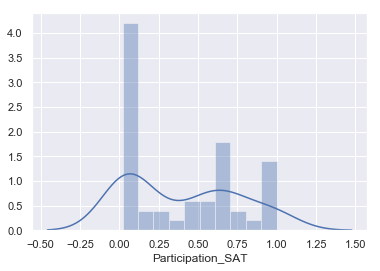

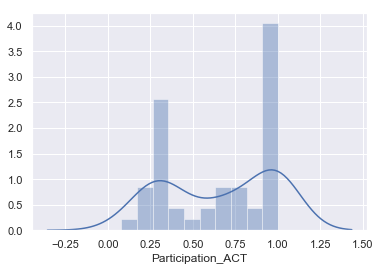

<Figure size 432x288 with 0 Axes>

In [19]:
sns.set()
# Participation Distributions
for series in [combined_data['Participation_SAT'], combined_data['Participation_ACT']]:
    sns.distplot(series, bins=10);
    plt.show();
    plt.clf()

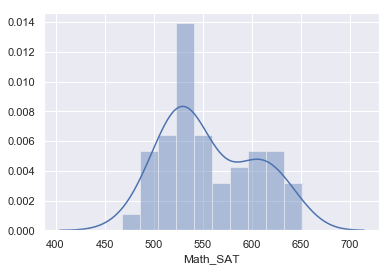

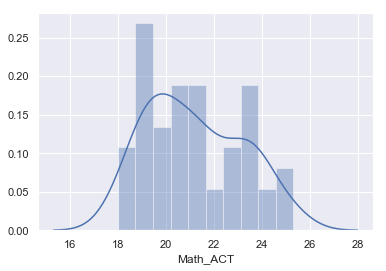

<Figure size 432x288 with 0 Axes>

In [20]:
# Math Distributions
for series in [combined_data['Math_SAT'], combined_data['Math_ACT']]:
    sns.distplot(series, bins=10);
    plt.show();
    plt.clf()

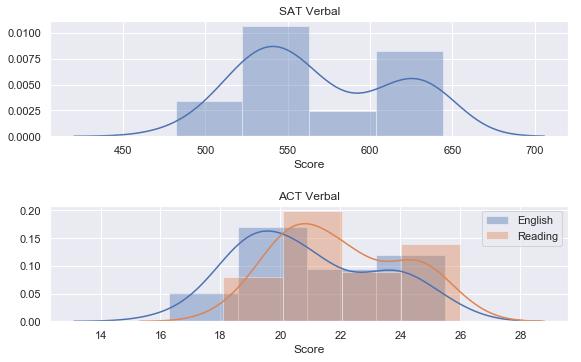

In [21]:
# Verbal Distributions
fig = plt.figure(figsize=(8, 5))
ax1 = fig.add_subplot(211)
ax1.set_title('SAT Verbal')
ax2 = fig.add_subplot(212)
ax2.set_title('ACT Verbal')
plt.tight_layout(h_pad=3.0)

sns.distplot(combined_data['Evidence-Based Reading and Writing'], ax=ax1, axlabel="Score")
sns.distplot(combined_data['English'], ax=ax2, label='English', axlabel='score')
sns.distplot(combined_data['Reading'], ax=ax2, label='Reading', axlabel="Score")

plt.legend()


### Based off these PDFs, it appears that things are not normal *wooh creepy*. Ha, just kidding. It looks like a [bivariate distribution](https://en.wikipedia.org/wiki/Multimodal_distribution). How can we test out this hypothesis?

In [27]:
# Well, for one, very few of the columns are normally distributed
import scipy.stats as stats
alpha= .05

In [28]:
non_normal_cols=[col for col in combined_data.columns if( (is_numeric_dtype(combined_data[col])  and stats.normaltest(combined_data[col])[1]<alpha) )]

In [29]:
non_normal_cols

['Participation_SAT',
 'Evidence-Based Reading and Writing',
 'Total',
 'Participation_ACT',
 'Math_ACT',
 'Reading',
 'Composite']

The columns above are non-normal with  $p < \alpha = 0.05$. This means that `Math_SAT`, `English`, and `Science` are all normal 

# Now, let's look at correlations within and between exams

**Here's a fair hypothesis: States that do well in the ACT will do well on the SAT, because they have an excellent education system! Let's see if this bears out in the stats**

In [36]:
# Do actually have to clean up the MD data from the original dfs for this section
act_data.loc[act_data['State']=="Maryland", "Science"]=23.2
sat_data.loc[sat_data['State']=="Maryland", "Math"]=524

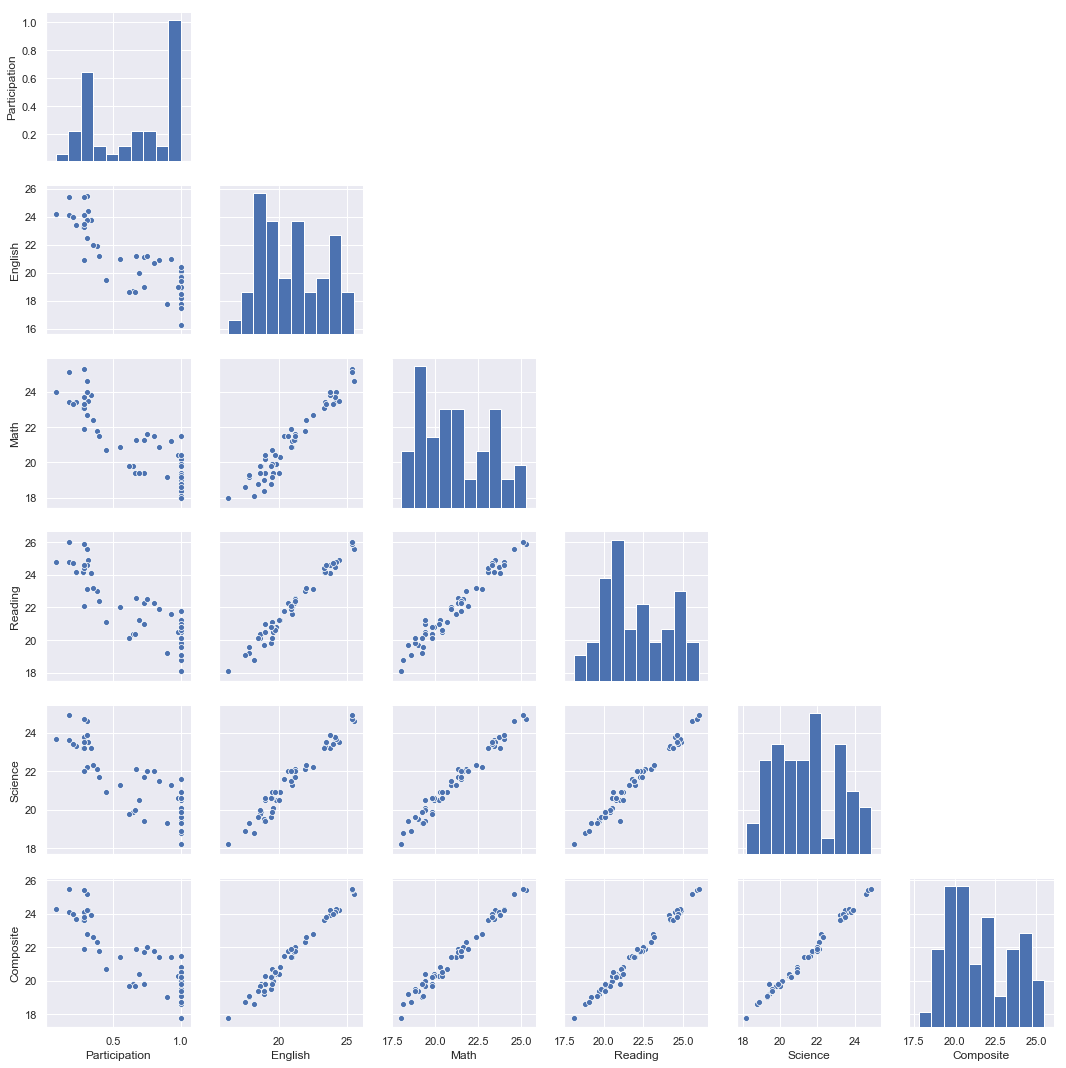

In [40]:
# Let's look at intra-test correlations first
# sns.set(font_scale=1)
g = sns.pairplot(act_data.iloc[1:, 1:])
for i, j in zip(*np.triu_indices_from(g.axes, 1)):
    g.axes[i, j].set_visible(False)

**This looks mostly as expected, eh? _Strong_ correlation between test subjects. Makes sense when we consider a state's education program.**

**However... What's up with the first column? It appears that there is a strong anti-correlation between Participation rates and Exam Scores.**

## This leads us to our first major insight: The greater the participation in a test, the lower the average score. This bears out when you consider so many states have mandatory testing. Also, tests that are not so popular in some states tend to be self selecting. The overachievers are the only ones to opt-in to taking them

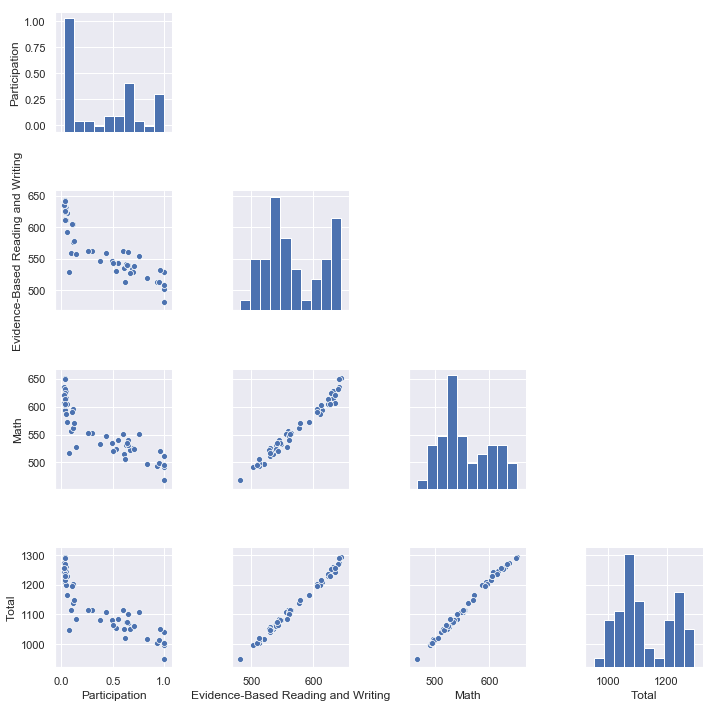

In [39]:
# Same goes for the SAT:
g = sns.pairplot(sat_data.iloc[:, 1:])
for i, j in zip(*np.triu_indices_from(g.axes, 1)):
    g.axes[i, j].set_visible(False)

**Now let's use a heat map to look at inter-test correlations (or lack-thereof):**

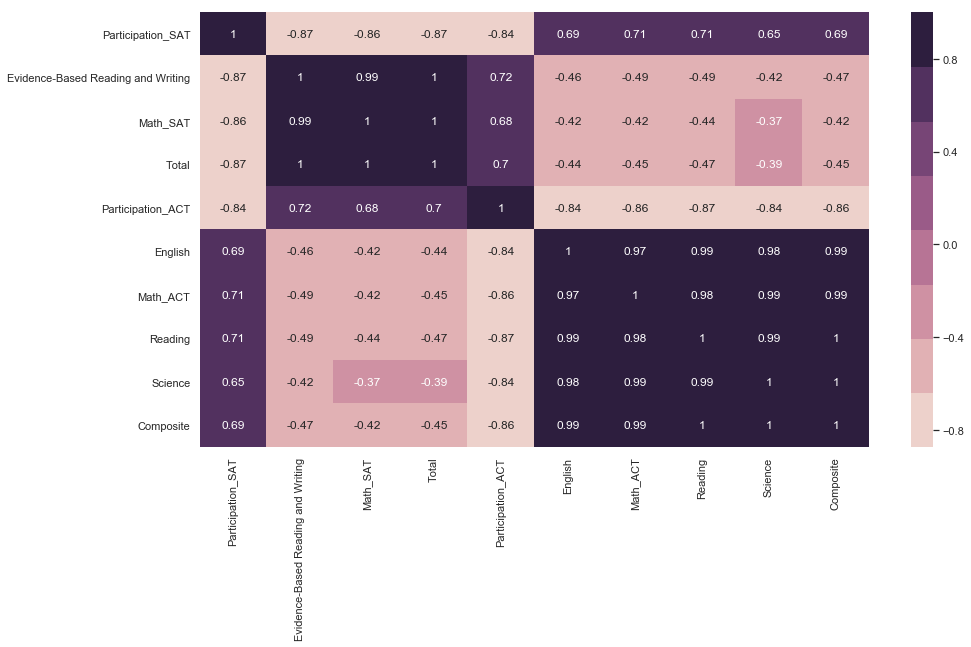

In [42]:
plt.figure(figsize=(15,8))
sns.heatmap(combined_data.corr(),cmap=sns.cubehelix_palette(8), annot=True)

**Observe the lower left (or upper right) quadrant. There are weak _negative_ correlations between inter-test scores. Our hypothesis seems to be going up in flames... :(**

**Let's think of an explanation: if you look at the correlation between Participations, you'll see that they are strongly negative. In other words: $\uparrow SAT Participation = \downarrow ACT Participation$**

**When we combine this with our previous insight that $\uparrow Participation = \downarrow Scores$, we can start to see that _States that favor a particular test score lower in it, while the unpopular test gets a slight boost due to student self-selection_. It appears that this effect outweighs the effect of "academic excellence" in a particular state raising the bar for both standardized exams**

## Further questions to consider:
  * __Do any states buck the trends and perform disproportionately well/poorly in some exam subjects? This could clue us in to specific policy strengths/weaknesses__
  
  * __How do these effects correlate on a regional level, not just state?__
  
  * __If we gathered more data about a state's education policies and programs, what more insights could we glean?__
  
  * __Same as above, but with historical data. Let's feed our ML model to predict which policies will result in which states getting better exam scores! #DataScience__